# Functional api

In [1]:
import tensorflow as tf
import datetime
from common import create_dataset, create_functional_api_model
from custom_training import train_and_test

%load_ext tensorboard

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


2021-08-30 09:44:44.324100: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-08-30 09:44:44.345697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-08-30 09:44:44.346733: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-08-30 09:44:44.347923: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the app

## データ取得

In [3]:
train_ds, valid_ds, test_ds = create_dataset(512, 0.2)

2021-08-30 09:44:46.097042: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 37632000 exceeds 10% of free system memory.
2021-08-30 09:44:46.148435: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 37632000 exceeds 10% of free system memory.


## 学習

In [4]:
model = create_functional_api_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


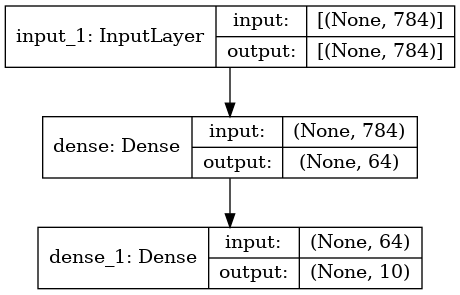

In [5]:
tf.keras.utils.plot_model(model, "functional_api_model.png", show_shapes=True)

In [6]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [7]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2021-08-30 09:44:46.668584: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-08-30 09:44:46.668655: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-08-30 09:44:46.668701: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2021-08-30 09:44:46.669365: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-08-30 09:44:46.684749: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-08-30 09:44:46.684929: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [8]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [9]:
# Define our metrics
train_loss = tf.keras.metrics.Mean('train_loss', dtype=tf.float32)
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('train_accuracy')
valid_loss = tf.keras.metrics.Mean('valid_loss', dtype=tf.float32)
valid_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('valid_accuracy')

In [10]:
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
valid_log_dir = 'logs/gradient_tape/' + current_time + '/valid'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
valid_summary_writer = tf.summary.create_file_writer(valid_log_dir)

In [11]:
train_and_test(model, loss_object, optimizer, train_ds, valid_ds, 20, train_loss, valid_loss, train_accuracy, valid_accuracy, train_summary_writer, valid_summary_writer)

2021-08-30 09:44:46.890794: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 37632000 exceeds 10% of free system memory.
2021-08-30 09:44:46.909716: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1, Loss: 0.7769182920455933, Accuracy: 0.7976250052452087, Test Loss: 0.33806896209716797, Test Accuracy: 0.9070833325386047


2021-08-30 09:44:52.426462: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 37632000 exceeds 10% of free system memory.


Epoch 2, Loss: 0.5447055101394653, Accuracy: 0.8556874990463257, Test Loss: 0.29963600635528564, Test Accuracy: 0.9169166684150696


2021-08-30 09:44:55.430467: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 37632000 exceeds 10% of free system memory.


Epoch 3, Loss: 0.44733548164367676, Accuracy: 0.8803402781486511, Test Loss: 0.2745760679244995, Test Accuracy: 0.9240833520889282
Epoch 4, Loss: 0.3903457224369049, Accuracy: 0.8949166536331177, Test Loss: 0.25622808933258057, Test Accuracy: 0.9291458129882812
Epoch 5, Loss: 0.3511834144592285, Accuracy: 0.905037522315979, Test Loss: 0.24231071770191193, Test Accuracy: 0.9330333471298218
Epoch 6, Loss: 0.3217426836490631, Accuracy: 0.9127326607704163, Test Loss: 0.23077042400836945, Test Accuracy: 0.9361666440963745
Epoch 7, Loss: 0.29840362071990967, Accuracy: 0.9188988208770752, Test Loss: 0.22119976580142975, Test Accuracy: 0.9387142658233643
Epoch 8, Loss: 0.2791912853717804, Accuracy: 0.9240573048591614, Test Loss: 0.2127503603696823, Test Accuracy: 0.9409895539283752
Epoch 9, Loss: 0.26310795545578003, Accuracy: 0.9283124804496765, Test Loss: 0.20549754798412323, Test Accuracy: 0.9429259300231934
Epoch 10, Loss: 0.24916456639766693, Accuracy: 0.9320208430290222, Test Loss: 0.199

In [12]:
model.evaluate(test_ds)

20/20 [==============================] - 0s 11ms/step - loss: 0.1029 - accuracy: 0.9696


[0.1029282733798027, 0.9696000218391418]

In [13]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 4037), started 0:23:45 ago. (Use '!kill 4037' to kill it.)